## Lasso path visualization

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Load dataset

In [2]:
pool_matrix = pd.read_excel('data/sensing_matrix_15drugs.xlsx')
pool_matrix = pool_matrix.fillna(0)

input_path = 'data/preprocessed/PL_K562_F.csv'
data = pd.read_csv(input_path)

print (pool_matrix)

   Palbociclib  Panobinostat  Raltitrexed  Methotrexate  Vemurafenib  \
0          0.0           1.0          1.0           0.0          1.0   
1          0.0           0.0          0.0           0.0          1.0   
2          0.0           0.0          0.0           0.0          0.0   
3          1.0           0.0          0.0           1.0          0.0   
4          1.0           1.0          0.0           0.0          0.0   
5          0.0           0.0          0.0           1.0          1.0   
6          1.0           0.0          1.0           0.0          0.0   
7          0.0           0.0          1.0           0.0          0.0   
8          0.0           1.0          0.0           1.0          0.0   

   Fimepinostat  Olaparib  Bafetinib  SCIO-469  OTS964  SL-327  Abemaciclib  \
0           0.0       0.0        0.0       1.0     0.0     0.0          0.0   
1           1.0       0.0        1.0       1.0     0.0     1.0          0.0   
2           0.0       1.0        0.0      

### Select protein and visualize Lasso path 

#### DHFR

In [3]:
i = 1383
g = data.loc[i, 'Gene Symbol']
print('This gene is {}'.format(g))

This gene is DHFR


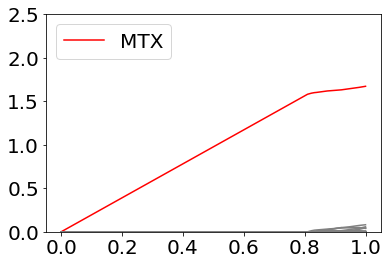

In [4]:
from sklearn import linear_model

cols = ['Abundances_Pool_{}'.format(i) for i in range(len(pool_matrix))]
X = np.nan_to_num(pool_matrix.values).astype(float)
y = data.loc[i, cols].values.astype(float)
y1 = np.log2(y / np.min(y))
_, _, coefs = linear_model.lars_path(X, y1, positive=True, method="lasso")

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

# plt.figure(figsize = (4,6), dpi = 250)
for j in range(coefs.shape[0]):
    if j == 3:
        plt.plot(xx, coefs[j,:], color='r', label='MTX')
    else:
        plt.plot(xx, coefs[j,:], color='grey')
                
plt.legend(fontsize = 20, loc='upper left')
plt.ylim(0, 2.5)
ymin, ymax = plt.ylim()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### HDAC1

In [5]:
i = 777
g = data.loc[i, 'Gene Symbol']
print('This gene is {}'.format(g))

This gene is HDAC1


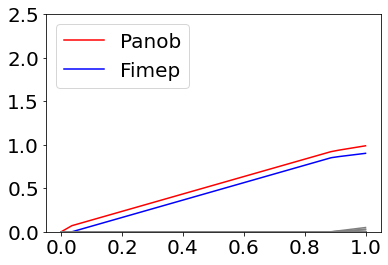

In [6]:
cols = ['Abundances_Pool_{}'.format(i) for i in range(len(pool_matrix))]
X = np.nan_to_num(pool_matrix.values).astype(float)
y = data.loc[i, cols].values.astype(float)
y1 = np.log2(y / np.min(y))
_, _, coefs = linear_model.lars_path(X, y1, positive=True, method="lasso")

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

# plt.figure(figsize = (4,6), dpi = 250)
for j in range(coefs.shape[0]):
    if j == 1:
        plt.plot(xx, coefs[j,:], color='r', label='Panob')
    elif j == 5:
        plt.plot(xx, coefs[j,:], color='b', label='Fimep')
    else:
        plt.plot(xx, coefs[j,:], color='grey')
                
plt.legend(fontsize = 20, loc='upper left')
plt.ylim(0, 2.5)
ymin, ymax = plt.ylim()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### RNF7

In [7]:
i = 3639
g = data.loc[i, 'Gene Symbol']
print('This gene is {}'.format(g))

This gene is RNF7


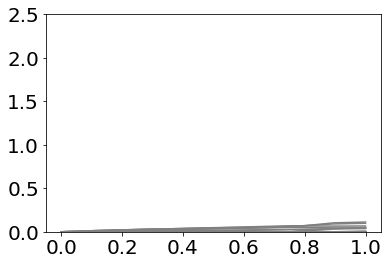

In [8]:
cols = ['Abundances_Pool_{}'.format(i) for i in range(len(pool_matrix))]
X = np.nan_to_num(pool_matrix.values).astype(float)
y = data.loc[i, cols].values.astype(float)
y1 = np.log2(y / np.min(y))
_, _, coefs = linear_model.lars_path(X, y1, positive=True, method="lasso")

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

# plt.figure(figsize = (4,6), dpi = 250)
for j in range(coefs.shape[0]):
    plt.plot(xx, coefs[j,:], color='grey')
                
# plt.legend(fontsize = 20, loc='upper left')
plt.ylim(0, 2.5)
ymin, ymax = plt.ylim()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()